<a href="https://colab.research.google.com/github/jadhavgaurav/cement-composite-strength-prediction/blob/main/cement_composite_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# import Data Manipulation library
import pandas as pd
import numpy as np

#Import Data visualizatio library
import matplotlib.pyplot as plt
import seaborn as sns

#Import filter warning library
import warnings
warnings.filterwarnings('ignore')

#Import scikit Learn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [27]:
# Import Dataset Using Pandas Function

url = 'https://raw.githubusercontent.com/jadhavgaurav/cement-composite-strength-prediction/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)
df.sample(frac = 1) # Shuffle Dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
802,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,31.65
922,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80
26,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
146,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
431,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,14,20.73
...,...,...,...,...,...,...,...,...,...
444,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,28,33.27
920,136.0,162.0,126.0,172.0,10.0,923.0,764.0,28,29.07
200,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,14,21.06
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99


In [28]:
# Checking Data information and Missing Values if any...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [29]:
# Checking Descriptive Stattistics
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Based on above information, we find that the dataset is non normal distributed

In [30]:
# Univariate Analysis

from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum' : df[i].max(),
        'Minimum' : df[i].min(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        '25%': df[i].quantile(0.25),
        '75%': df[i].quantile(0.75),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)

report = pd.DataFrame(stats)
report

,Feature,Maximum,Minimum,Mean,Median,25%,75%,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,540.0,102.00,281.167864,272.900,192.375,350.000,104.506364,10921.580220,0.509481,-0.520652,157.625
1,blast_furnace_slag,359.4,0.00,73.895825,22.000,0.000,142.950,86.279342,7444.124812,0.800717,-0.508175,142.950
2,fly_ash,200.1,0.00,54.188350,0.000,0.000,118.300,63.997004,4095.616541,0.537354,-1.328746,118.300
3,water,247.0,121.80,181.567282,185.000,164.900,192.000,21.354219,456.002651,0.074628,0.122082,27.100
4,superplasticizer,32.2,0.00,6.204660,6.400,0.000,10.200,5.973841,35.686781,0.907203,1.411269,10.200
5,coarse_aggregate,1145.0,801.00,972.918932,968.000,932.000,1029.400,77.753954,6045.677357,-0.040220,-0.599016,97.400
6,fine_aggregate,992.6,594.00,773.580485,779.500,730.950,824.000,80.175980,6428.187792,-0.253010,-0.102177,93.050
7,age,365.0,1.00,45.662136,28.000,7.000,56.000,63.169912,3990.437729,3.269177,12.168989,49.000
8,concrete_compressive_strength,82.6,2.33,35.817961,34.445,23.710,46.135,16.705742,279.081814,0.416977,-0.313725,22.425


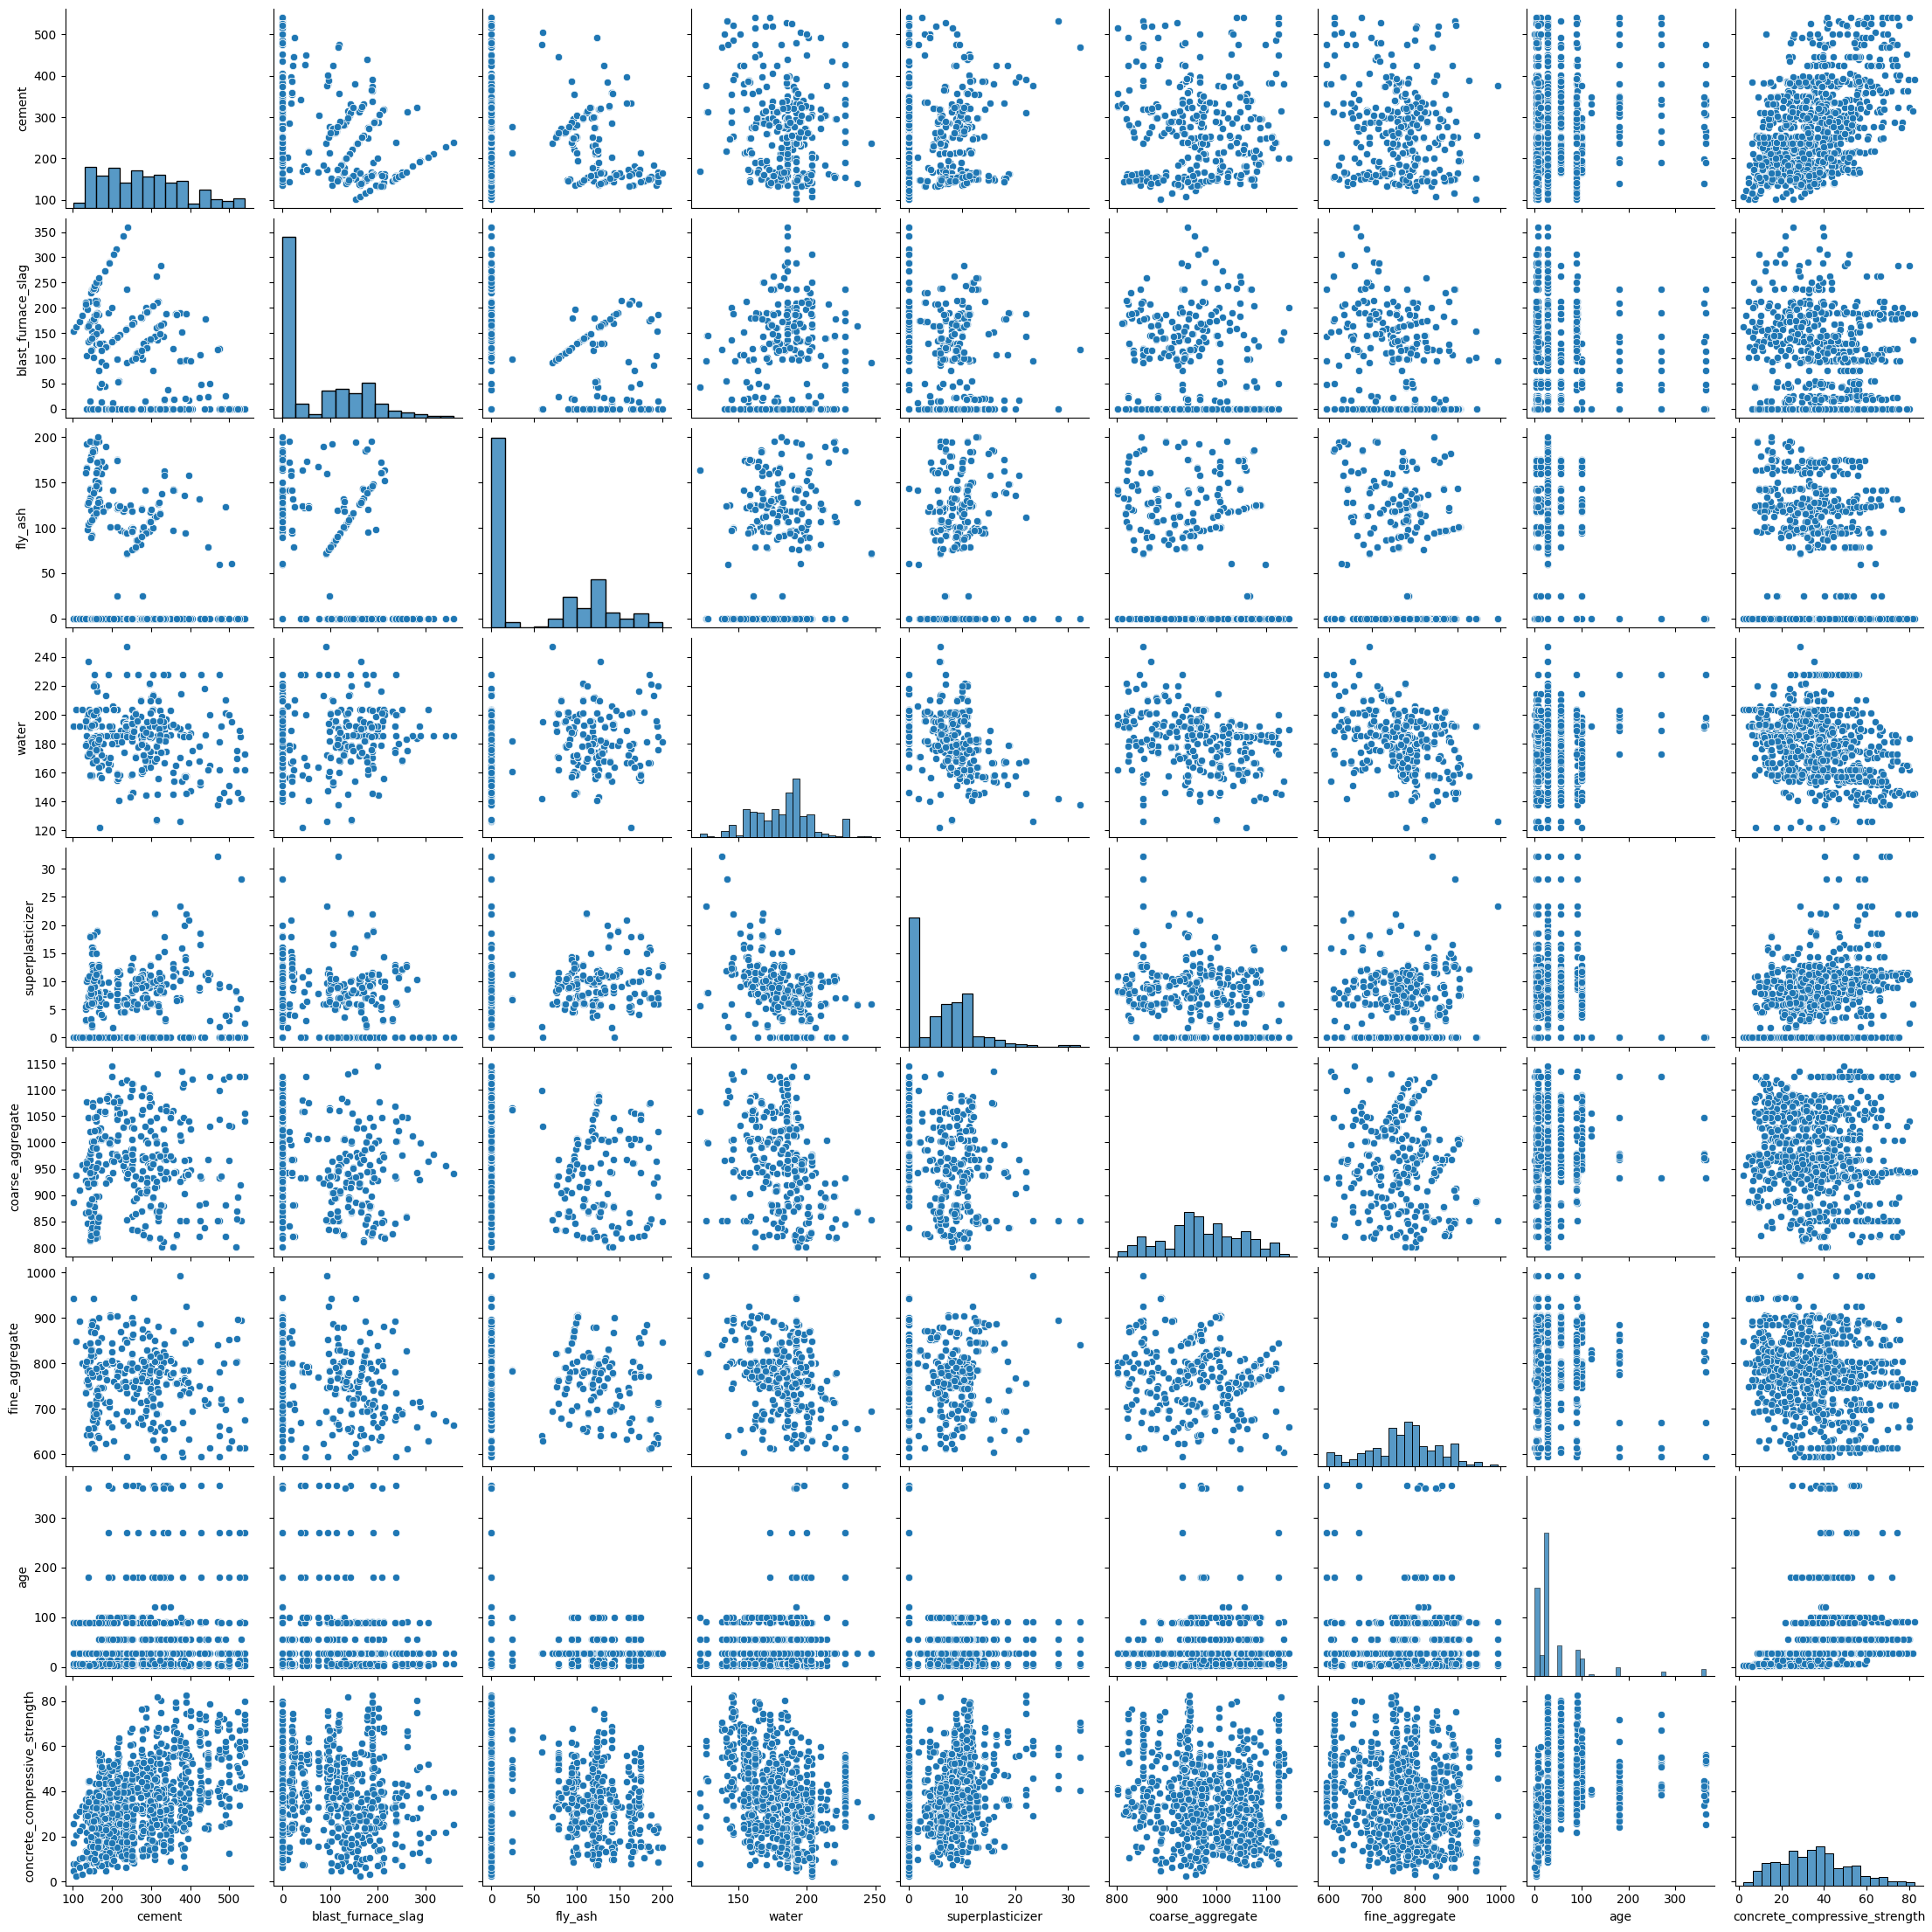

In [31]:
sns.pairplot(df)

In [32]:
# Feature Engineering

df['Comps'] = (df['cement'] + df['blast_furnace_slag'] + df['superplasticizer']) / df['water']

In [33]:
df.corr()['concrete_compressive_strength']

,concrete_compressive_strength
cement,0.497832
blast_furnace_slag,0.134829
fly_ash,-0.105755
water,-0.289633
superplasticizer,0.366079
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
age,0.328873
concrete_compressive_strength,1.000000
Comps,0.620196


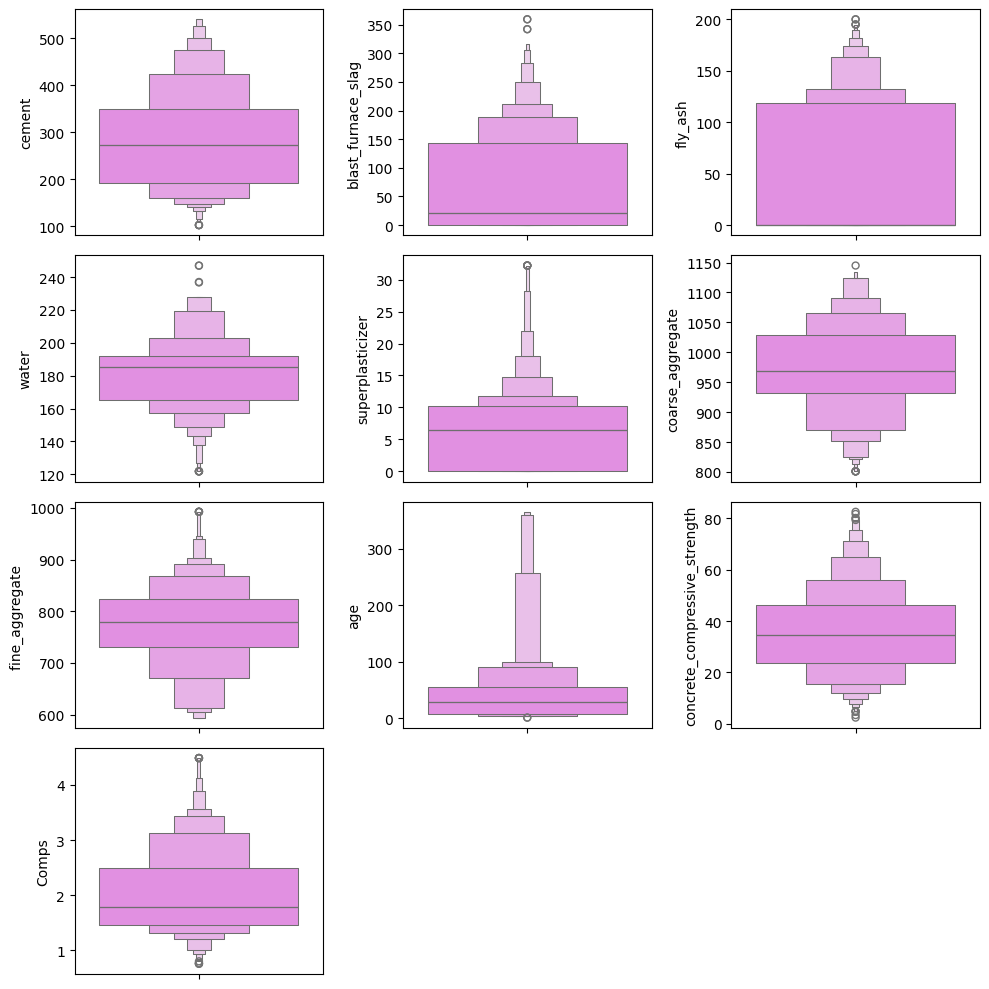

In [34]:
# Boxplot for detecting outliers in the dataset
plt.figure(figsize=(10, 10))
plot = 0
for i in df.columns:
    plot += 1
    plt.subplot(4, 3, plot)
    sns.boxenplot(df[i], color='violet')
    plt.tight_layout()
plt.show()


In [35]:

# Checking Column Names
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength', 'Comps'],
      dtype='object')

In [36]:
# Split Data into X and y
X = df.drop(columns = ['concrete_compressive_strength']) # Independent Columns
y = df['concrete_compressive_strength'] # target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

fit_tranform is only applied to traqin and transform is applied to test set to avoid data leakage.

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train.max(), X_train.min()

(1.0000000000000002, 0.0)

In [39]:
# import RandomForest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = r2_score(y_test, y_pred)

print(f'The Accuracy is: {round(score, 2)}')

The Accuracy is: 0.89


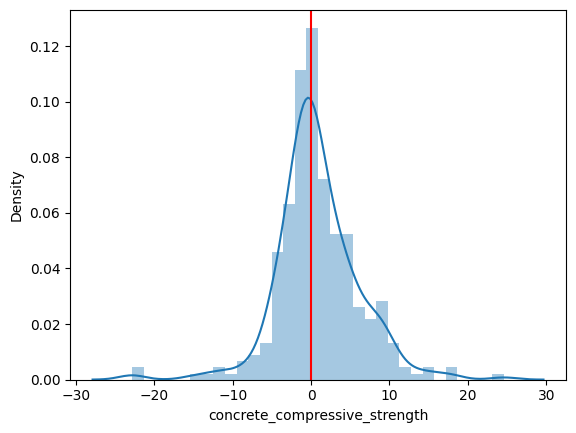

In [40]:

sns.distplot(y_test - y_pred)
plt.axvline(0,color = 'red')
plt.show()

In [41]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [42]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 9 ))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1569.2136 - mae: 35.8686
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1392.8467 - mae: 33.2859
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514.8621 - mae: 18.0258 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.6066 - mae: 11.9792 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182.9009 - mae: 11.1193 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.2689 - mae: 10.7164 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.3108 - mae: 10.3036 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.9320 - mae: 9.0665
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.8203 - mae: 8.9370
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.2457 - mae: 8.9867
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.0555 - mae: 8.2292
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.0296 - mae: 9.2886

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

<Axes: >

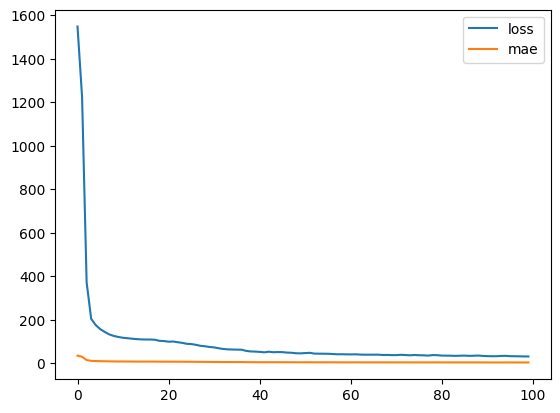

In [44]:
hist = model.history.history
hist = pd.DataFrame(hist)
hist.plot()

In [45]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [46]:
score = r2_score(y_test, y_pred)

print(f'The Accuracy is: {round(score, 2)}')

The Accuracy is: 0.85
